### Importations des librairies et chargement de la base

In [27]:
#!pip install pandas==2.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 19.7 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pandas: filename=pandas-2.0.3-cp312-cp312-linux_x86_64.whl size=11689884 sha256=b922bd2173305e9ed420d0fa51b1688feef434059193741a4c3deb68ceb07e52
  Stored in directory: /home/onyxia/.cache/pip/wheels/08/95/b7/15a2a9958c1fde0807c23b05bfed1a32ff9c7225c55d270d27
Successfully built pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3


In [85]:
%matplotlib inline
import re
from os import path, getenv, environ
from typing import Dict

from datetime import datetime

import folium
import matplotlib.pyplot as plt
#import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import scipy
import scipy.stats as stats
import seaborn as sns
from sklearn import set_config
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


set_config(display="diagram", print_changed_only=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [86]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date 
#from datetime import datetime
import seaborn as sns
from scipy import stats
import statsmodels.api
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
# Importation de la base de données  avec la fonction path.join qui prend en argument la localisation

# ce fichier recuperé  sera affecté à la varaible data et le séparateur est point virgule.
data = pd.read_csv("base_ano22_utf8.csv", sep=",")
# Utilisation de shape pour afficher la taille( nombres de ligne, nombre de colonnes) de data
print("The data shape is: {shape}".format(shape=data.shape))
data.head()

/tmp/ipykernel_1481/2713515389.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("base_ano22_utf8.csv", sep=",")


The data shape is: (2167107, 45)


,id_personne,Mois_soins,delta,remb_mutuelle,frais_reels,nb_acte,id_cont,rg_benef,type_benef,genre,code_postal,Age22,Foyer22,colloc,adh_fac,type_cont,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,CONSOMMANT2201,CONSOMMANT2202,CONSOMMANT2203,CONSOMMANT2204,CONSOMMANT2205,CONSOMMANT2206,CONSOMMANT2207,CONSOMMANT2208,CONSOMMANT2209,CONSOMMANT2210,CONSOMMANT2211,CONSOMMANT2212,tranche_age22,sum_pres,personne_morale,entite_eco,annee_soins
0,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,3.0,1.0,26.60,56.50,13.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011.0,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022
1,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,7.0,0.0,4.63,6.62,2.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011.0,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022
2,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,10.0,0.0,5.42,8.88,4.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011.0,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022
3,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,0.0,-1.0,0.00,0.00,0.0,d32a29b4a83ca5eef3e0d1983db8f61e5d2208c876892ff120d790080433a4ba,1,SalariÃ©,Homme,80011.0,43.019001,ND,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[40.0; 45.0[,12.0,PM2,EE1,2022
4,2a22efe4b94b6d0d3b449802dbcaeb0ac1ba129226ad72447cc0959ad5f553fc,8.0,1.0,4.59,13.11,6.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,2,Conjoint,Homme,80011.0,60.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,[60.0; 65.0[,12.0,PM1,EE1,2022


In [88]:
data.duplicated().sum()

np.int64(2)

In [89]:
mod = data['code_postal'].unique()
print(mod)

[80011.0 59000.0 52100.0 ... 66141.0 48250.0 40013.0]


In [90]:
# nombres de lignes par departement
data.groupby(["code_postal"])["id_personne"].count()

code_postal
197.0         1
206.0         3
1000.0      730
1050.0        1
1090.0      570
           ... 
97435.0      13
99999       317
99999.0    2760
AD400         2
L3321         9
Name: id_personne, Length: 8566, dtype: int64

In [91]:
t=data[data['code_postal']=='99999']
t[['id_personne', 'code_postal']]

,id_personne,code_postal
32404,42a5517061b952f81cac4fdd4b7d04daabb830067bffcff5a66f8611aa563b48,99999
32427,2a97a066b0cc9f6faa4a3241c6a751401777f2fdd4778a14bd5d08a6b4838fd7,99999
32434,a9847b855d5c1a08359355ac82b4be7bc7e743ea0c1ebb406d35a88d0547aafe,99999
32445,587e375ed140b20bcf483e591465c9fe90a505845a3b2d861594ad687003e263,99999
32450,e9d67a514c163da8d5b90c0274fcb53dacd5dd80f65c2a6f54944f443d9dd34e,99999
...,...,...
1064892,f03449832ca55d10e01cb87b447581afb6c7c41b06f5b05ee87dbb0d0508e761,99999
1064893,94ea163a1aeec46076610a89d30aa2d30d34a0bc9da2d8c22407193b48550e0f,99999
1064930,b7a8b8e5790c2f1d50ec7ad8ceda9edcab491c3d24037c4502ef9d7b6032d665,99999
1064938,807d720542fe09d89721b4a3cf9bc056d439103f6dd830b9b7079272545e1da9,99999


In [92]:
#création de la variable donnant le nombre de bénéficiaires par département 
data['nb_benef_dep'] = data.groupby('code_postal')['code_postal'].transform('count')
data.head()

,id_personne,Mois_soins,delta,remb_mutuelle,frais_reels,nb_acte,id_cont,rg_benef,type_benef,genre,code_postal,Age22,Foyer22,colloc,adh_fac,type_cont,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,CONSOMMANT2201,CONSOMMANT2202,CONSOMMANT2203,CONSOMMANT2204,CONSOMMANT2205,CONSOMMANT2206,CONSOMMANT2207,CONSOMMANT2208,CONSOMMANT2209,CONSOMMANT2210,CONSOMMANT2211,CONSOMMANT2212,tranche_age22,sum_pres,personne_morale,entite_eco,annee_soins,nb_benef_dep
0,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,3.0,1.0,26.60,56.50,13.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011.0,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022,6
1,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,7.0,0.0,4.63,6.62,2.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011.0,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022,6
2,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,10.0,0.0,5.42,8.88,4.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011.0,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022,6
3,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,0.0,-1.0,0.00,0.00,0.0,d32a29b4a83ca5eef3e0d1983db8f61e5d2208c876892ff120d790080433a4ba,1,SalariÃ©,Homme,80011.0,43.019001,ND,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[40.0; 45.0[,12.0,PM2,EE1,2022,6
4,2a22efe4b94b6d0d3b449802dbcaeb0ac1ba129226ad72447cc0959ad5f553fc,8.0,1.0,4.59,13.11,6.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,2,Conjoint,Homme,80011.0,60.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,[60.0; 65.0[,12.0,PM1,EE1,2022,6


### Formatons un peu les colonnes et traitons les valerus manquantes

In [93]:
# Calculer la modalité dominante
modalite_dominante = data['tranche_age22'].mode()[0]

# Remplacer les valeurs NA par la modalité dominante
data['tranche_age22'].fillna(modalite_dominante, inplace=True)

/tmp/ipykernel_1481/850319194.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['tranche_age22'].fillna(modalite_dominante, inplace=True)


In [94]:
nan_count =data['tranche_age22'].isna().sum()
nan_count

np.int64(0)

In [95]:
data['nb_occ_id'] = data.groupby('id_personne')['id_personne'].transform('count')

In [96]:
nan_count =data['nb_benef_dep'].isna().sum()
nan_count

np.int64(0)

In [97]:
doublons = data[data.duplicated(subset=['id_personne', 'annee_soins', 'Mois_soins', 'delta'], keep=False)]
doublons.head()

,id_personne,Mois_soins,delta,remb_mutuelle,frais_reels,nb_acte,id_cont,rg_benef,type_benef,genre,code_postal,Age22,Foyer22,colloc,adh_fac,type_cont,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,CONSOMMANT2201,CONSOMMANT2202,CONSOMMANT2203,CONSOMMANT2204,CONSOMMANT2205,CONSOMMANT2206,CONSOMMANT2207,CONSOMMANT2208,CONSOMMANT2209,CONSOMMANT2210,CONSOMMANT2211,CONSOMMANT2212,tranche_age22,sum_pres,personne_morale,entite_eco,annee_soins,nb_benef_dep,nb_occ_id
137905,888248f93e2928b41fd05295eb9e893860e77db4c0fca4954426518e559fbe20,0.0,-1.0,0.0,0.0,0.0,848b049365773ca6dbbe02013fa61f379f59d05a50032c29b61f97a071f4e40f,1,SalariÃ©,Homme,34260.0,57.0,SalariÃ© seul,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[55.0; 60.0[,5.0,PM2,EE52,2022,118,3
137906,888248f93e2928b41fd05295eb9e893860e77db4c0fca4954426518e559fbe20,0.0,-1.0,0.0,0.0,0.0,848b049365773ca6dbbe02013fa61f379f59d05a50032c29b61f97a071f4e40f,1,SalariÃ©,Homme,34260.0,57.0,SalariÃ© seul,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[55.0; 60.0[,2.0,PM2,EE52,2022,118,3
155320,db5703821712bfc2d2a76cc92456338955b15e4c871c1b310a8bc2ad9853410d,0.0,-1.0,0.0,0.0,0.0,d32a29b4a83ca5eef3e0d1983db8f61e5d2208c876892ff120d790080433a4ba,4,Enfant mineur,Enfant,99999.0,12.0,SalariÃ© et 2 enfants,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0; 18[,7.0,PM2,EE120,2022,200844,2
155321,db5703821712bfc2d2a76cc92456338955b15e4c871c1b310a8bc2ad9853410d,0.0,-1.0,0.0,0.0,0.0,d32a29b4a83ca5eef3e0d1983db8f61e5d2208c876892ff120d790080433a4ba,4,Enfant mineur,Enfant,99999.0,12.0,SalariÃ© et 2 enfants,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0; 18[,6.0,PM2,EE120,2022,200844,2
163314,c76865d7e75ed21911710e24b5fa7969b46e4f31ec6ccf8b52842c96611c5169,0.0,-1.0,0.0,0.0,0.0,d32a29b4a83ca5eef3e0d1983db8f61e5d2208c876892ff120d790080433a4ba,1,SalariÃ©,Femme,77700.0,64.0,SalariÃ© et conjoint et 3+ enfants,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[60.0; 65.0[,7.0,PM2,EE148,2022,1608,8


In [98]:
resultat = doublons.loc[doublons.groupby(['id_personne', 'annee_soins', 'Mois_soins'])['sum_pres'].idxmax()]
resultat.head()

,id_personne,Mois_soins,delta,remb_mutuelle,frais_reels,nb_acte,id_cont,rg_benef,type_benef,genre,code_postal,Age22,Foyer22,colloc,adh_fac,type_cont,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,CONSOMMANT2201,CONSOMMANT2202,CONSOMMANT2203,CONSOMMANT2204,CONSOMMANT2205,CONSOMMANT2206,CONSOMMANT2207,CONSOMMANT2208,CONSOMMANT2209,CONSOMMANT2210,CONSOMMANT2211,CONSOMMANT2212,tranche_age22,sum_pres,personne_morale,entite_eco,annee_soins,nb_benef_dep,nb_occ_id
2004329,001790ed99575054df6800d0e2c1d3abf5cc157537dabf17f46ffb00616fa8eb,0.0,-1.0,0.0,0.0,0.0,d32a29b4a83ca5eef3e0d1983db8f61e5d2208c876892ff120d790080433a4ba,1,SalariÃ©,Femme,99999.0,53.0,SalariÃ© seul,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[50.0; 55.0[,10.0,PM2,EE8,2022,200844,2
1928270,007cafb63c1b30fa1d8a0ebe885092cd8847c94c50b2bb3cd4486ddcab2b64dc,0.0,-1.0,0.0,0.0,0.0,d32a29b4a83ca5eef3e0d1983db8f61e5d2208c876892ff120d790080433a4ba,4,Enfant mineur,Enfant,75008.0,15.0,SalariÃ© et 3+ enfants,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0; 18[,6.0,PM2,EE8,2022,2674,3
1169649,00fc11c1023747ed00eed7824025c5a3dcf2c81907b8b610a58a58bb8b55e532,0.0,-1.0,0.0,0.0,0.0,d32a29b4a83ca5eef3e0d1983db8f61e5d2208c876892ff120d790080433a4ba,1,SalariÃ©,Homme,79400.0,44.0,SalariÃ© seul,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[40.0; 45.0[,6.0,PM2,EE3550,2022,385,5
1902709,01a1fdf09bf7a90298f3107bc5a2db1b45a5ba0c13f16886829a3bceceb447e0,0.0,-1.0,0.0,0.0,0.0,d32a29b4a83ca5eef3e0d1983db8f61e5d2208c876892ff120d790080433a4ba,1,SalariÃ©,Femme,37540.0,21.0,SalariÃ© seul,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[18; 24[,9.0,PM2,EE8,2022,376,3
1829468,01be5fd6198de79634103141ab0a6c6df97f5bda0d18b4afa9e54270ecad96ee,0.0,-1.0,0.0,0.0,0.0,d32a29b4a83ca5eef3e0d1983db8f61e5d2208c876892ff120d790080433a4ba,4,Enfant mineur,Enfant,62110.0,3.0,SalariÃ© et 3+ enfants,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[0; 18[,9.0,PM2,EE8,2022,701,3


In [99]:
# Supprimer les lignes de doublons qui ne sont pas dans résultats
index_a_conserver = list(set(doublons.index) - set(resultat.index))
data = data.drop(index_a_conserver)


In [100]:
data['sum_pres'] = data.groupby('id_personne')['sum_pres'].transform('max')

In [101]:
doublons = data[data.duplicated(subset=['id_personne', 'annee_soins', 'Mois_soins', 'delta'], keep=False)]
doublons

,id_personne,Mois_soins,delta,remb_mutuelle,frais_reels,nb_acte,id_cont,rg_benef,type_benef,genre,code_postal,Age22,Foyer22,colloc,adh_fac,type_cont,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,CONSOMMANT2201,CONSOMMANT2202,CONSOMMANT2203,CONSOMMANT2204,CONSOMMANT2205,CONSOMMANT2206,CONSOMMANT2207,CONSOMMANT2208,CONSOMMANT2209,CONSOMMANT2210,CONSOMMANT2211,CONSOMMANT2212,tranche_age22,sum_pres,personne_morale,entite_eco,annee_soins,nb_benef_dep,nb_occ_id


In [102]:
t=data[(data['Mois_soins']==0) & (data['nb_occ_id']!=1)]
t[['id_personne', 'annee_soins', 'Mois_soins', 'delta', 'nb_occ_id' ]]

,id_personne,annee_soins,Mois_soins,delta,nb_occ_id
3,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,2022,0.0,-1.0,4
5,2a22efe4b94b6d0d3b449802dbcaeb0ac1ba129226ad72447cc0959ad5f553fc,2022,0.0,-1.0,2
19,95bcc106992e49c803a8697377a7d48718cc8f4aa3f6a2d692d9104f7969e906,2022,0.0,-1.0,10
21,3071e66d49a51263d9388f695132d7742b85ea641fe242176643856c32dff982,2022,0.0,-1.0,2
26,a8ae09e3fbe510b3e809b860d8723da2b8a06b73a2c9eddf6b201f5868c7d328,2022,0.0,-1.0,5
...,...,...,...,...,...
2167078,da9bd4530c2adce6dd254b15e4e95df614687d62bc82c0499380c1995c7a2d45,2022,0.0,-1.0,5
2167082,fa1aea8df13adb27096645be9829ab324b43c8946058fc7eefc2ab98ec094e89,2022,0.0,-1.0,4
2167094,94ec8e43779d9370b38921954a52738e2c05b231da0afcb07daaeeae5f1990e8,2022,0.0,-1.0,6
2167102,dd36067eefe44bbfe082ef5115c81a0f26dd13f1735bb84882318196079d8752,2022,0.0,-1.0,8


In [104]:
# Supprimer les lignes conforme aux critères
data = data[~((data['annee_soins'] == 0) & (data['nb_occ_id'] != 1))]

In [105]:
t=data[(data['Mois_soins']==0) & (data['nb_occ_id']!=1)]
t[['id_personne', 'annee_soins', 'Mois_soins', 'delta', 'nb_occ_id' ]]

,id_personne,annee_soins,Mois_soins,delta,nb_occ_id
3,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,2022,0.0,-1.0,4
5,2a22efe4b94b6d0d3b449802dbcaeb0ac1ba129226ad72447cc0959ad5f553fc,2022,0.0,-1.0,2
19,95bcc106992e49c803a8697377a7d48718cc8f4aa3f6a2d692d9104f7969e906,2022,0.0,-1.0,10
21,3071e66d49a51263d9388f695132d7742b85ea641fe242176643856c32dff982,2022,0.0,-1.0,2
26,a8ae09e3fbe510b3e809b860d8723da2b8a06b73a2c9eddf6b201f5868c7d328,2022,0.0,-1.0,5
...,...,...,...,...,...
2167078,da9bd4530c2adce6dd254b15e4e95df614687d62bc82c0499380c1995c7a2d45,2022,0.0,-1.0,5
2167082,fa1aea8df13adb27096645be9829ab324b43c8946058fc7eefc2ab98ec094e89,2022,0.0,-1.0,4
2167094,94ec8e43779d9370b38921954a52738e2c05b231da0afcb07daaeeae5f1990e8,2022,0.0,-1.0,6
2167102,dd36067eefe44bbfe082ef5115c81a0f26dd13f1735bb84882318196079d8752,2022,0.0,-1.0,8


In [106]:
a=data[(data['nb_occ_id']==1)]
a[['id_personne','annee_soins', 'Mois_soins']]

,id_personne,annee_soins,Mois_soins
6,41ed447a1db9193c29a484d2970e91041becfa297779e97d2818c56c7aa8e716,2022,3.0
166,9b82a9ddb7e5ac616666bc258cce026fb7851840e50225c6d160d68411e2402a,2022,0.0
217,a59f8db5fbbca4e631b1f9851c41df5a210d77c9e744abad1a51a1714ece4217,2022,3.0
300,d361ad5f4d35237e14a071d39617242247acbfeba2dfe930bb9d7d77cc4562bd,2022,0.0
369,020ca3f2dc7365b4bb50a55d447e5b4cd103bf00614d28f77cf79a70538b08a6,2022,1.0
...,...,...,...
2167044,82555fbf973ad986e12fcd40358835182ea23195c0c12038ceb0406958daa64a,2022,9.0
2167052,f460fdf48794b5be3d582658457cbe16b957e62898a41e9ac8164d1082c50e0e,2022,6.0
2167053,571aa77e84c3c652e79910eca96d1a13cfb1a0876cd717f4b5669587eb815f50,2022,0.0
2167054,13c2d7873047b0a86336616eeea8b19f678cf42107eecbc20cd94438948be23c,2022,0.0


In [107]:
### Pour la variable 'colonne', lister les modalités uniques
modalites =data['code_postal'].unique()
print(modalites)

[80011.0 59000.0 52100.0 ... 66141.0 48250.0 40013.0]


In [108]:
data['code_postal'].dtype

dtype('O')

In [109]:
data['genre_num'] = data['genre'].replace({'Homme': 1, 'Femme': 2, 'Enfant': 3})

## Créons une base de format 'une ligne un identifiant' pour la classification

In [110]:
data.head()

,id_personne,Mois_soins,delta,remb_mutuelle,frais_reels,nb_acte,id_cont,rg_benef,type_benef,genre,code_postal,Age22,Foyer22,colloc,adh_fac,type_cont,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,CONSOMMANT2201,CONSOMMANT2202,CONSOMMANT2203,CONSOMMANT2204,CONSOMMANT2205,CONSOMMANT2206,CONSOMMANT2207,CONSOMMANT2208,CONSOMMANT2209,CONSOMMANT2210,CONSOMMANT2211,CONSOMMANT2212,tranche_age22,sum_pres,personne_morale,entite_eco,annee_soins,nb_benef_dep,nb_occ_id,genre_num
0,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,3.0,1.0,26.60,56.50,13.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011.0,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022,6,4,2
1,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,7.0,0.0,4.63,6.62,2.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011.0,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022,6,4,2
2,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,10.0,0.0,5.42,8.88,4.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011.0,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022,6,4,2
3,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,0.0,-1.0,0.00,0.00,0.0,d32a29b4a83ca5eef3e0d1983db8f61e5d2208c876892ff120d790080433a4ba,1,SalariÃ©,Homme,80011.0,43.019001,ND,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[40.0; 45.0[,12.0,PM2,EE1,2022,6,4,1
4,2a22efe4b94b6d0d3b449802dbcaeb0ac1ba129226ad72447cc0959ad5f553fc,8.0,1.0,4.59,13.11,6.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,2,Conjoint,Homme,80011.0,60.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,[60.0; 65.0[,12.0,PM1,EE1,2022,6,2,1


In [111]:
data['code_postal'] = data['code_postal'].astype(str).apply(lambda x: x[:-2] if x.endswith('.0') else x)
data['annee_soins'] = data['annee_soins'].astype(str).apply(lambda x: x[:-2] if x.endswith('.0') else x)
data['Mois_soins'] = data['Mois_soins'].astype(str).apply(lambda x: x[:-2] if x.endswith('.0') else x)


In [112]:

data['id_personne'] = data['id_personne'].astype('category')
data['id_personne'] = data['id_personne'].astype(str).apply(lambda x: x[:-2] if x.endswith('.0') else x)


#### création des variables de consommation ou de remboursement par acte pour chaque mois

### ra == remboursement par acte
### fra === frais reels par acte

In [113]:

# Vérifier si le nombre d'acte est différent de 0 avant d'effectuer les opérations
data['ra'] = data['remb_mutuelle']/data['nb_acte']
data['ra'] = data.apply(lambda row: row['ra'] if row['nb_acte'] != 0 else 0, axis=1)

data['fra'] = data['frais_reels']/data['nb_acte']
data['fra'] = data.apply(lambda row: row['fra'] if row['nb_acte'] != 0 else 0, axis=1)


data.head()

,id_personne,Mois_soins,delta,remb_mutuelle,frais_reels,nb_acte,id_cont,rg_benef,type_benef,genre,code_postal,Age22,Foyer22,colloc,adh_fac,type_cont,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,CONSOMMANT2201,CONSOMMANT2202,CONSOMMANT2203,CONSOMMANT2204,CONSOMMANT2205,CONSOMMANT2206,CONSOMMANT2207,CONSOMMANT2208,CONSOMMANT2209,CONSOMMANT2210,CONSOMMANT2211,CONSOMMANT2212,tranche_age22,sum_pres,personne_morale,entite_eco,annee_soins,nb_benef_dep,nb_occ_id,genre_num,ra,fra
0,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,3,1.0,26.60,56.50,13.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022,6,4,2,2.046154,4.346154
1,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,7,0.0,4.63,6.62,2.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022,6,4,2,2.315000,3.310000
2,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,10,0.0,5.42,8.88,4.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022,6,4,2,1.355000,2.220000
3,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,0,-1.0,0.00,0.00,0.0,d32a29b4a83ca5eef3e0d1983db8f61e5d2208c876892ff120d790080433a4ba,1,SalariÃ©,Homme,80011,43.019001,ND,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[40.0; 45.0[,12.0,PM2,EE1,2022,6,4,1,0.000000,0.000000
4,2a22efe4b94b6d0d3b449802dbcaeb0ac1ba129226ad72447cc0959ad5f553fc,8,1.0,4.59,13.11,6.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,2,Conjoint,Homme,80011,60.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,[60.0; 65.0[,12.0,PM1,EE1,2022,6,2,1,0.765000,2.185000


In [115]:
base_class = data
base_class['annee_soins']=2022
for mois in range(1, 13):
    mois_str = str(mois).zfill(2)  # Convertir le mois en chaîne et ajouter un zéro si nécessaire
    nom_variable = 'ra_' + mois_str  # Nom de la variable
    base_class['Mois_str'] = base_class['Mois_soins'].astype(str).str.zfill(2)
    base_class[nom_variable] = base_class.loc[(base_class['annee_soins'] == 2022) & (base_class['Mois_str'] == mois_str), 'ra']

    

* création des variables conso_reelle

In [116]:

for mois in range(1, 13):
    mois_str = str(mois).zfill(2)  # Convertir le mois en chaîne et ajouter un zéro si nécessaire
    nom_variable = 'fra_' + mois_str  # Nom de la variable
    base_class['Mois_str'] = base_class['Mois_soins'].astype(str).str.zfill(2)
    base_class[nom_variable] = base_class.loc[(base_class['annee_soins'] == 2022) & (base_class['Mois_str'] == mois_str), 'fra']



* création des variables delta

In [117]:

for mois in range(1, 13):
    mois_str = str(mois).zfill(2)  # Convertir le mois en chaîne et ajouter un zéro si nécessaire
    nom_variable = 'delta_' + mois_str  # Nom de la variable
    base_class['Mois_str'] = base_class['Mois_soins'].astype(str).str.zfill(2)
    base_class[nom_variable] = base_class.loc[(base_class['annee_soins'] == 2022) & (base_class['Mois_str'] == mois_str), 'delta']



In [118]:
base_class.head()

,id_personne,Mois_soins,delta,remb_mutuelle,frais_reels,nb_acte,id_cont,rg_benef,type_benef,genre,code_postal,Age22,Foyer22,colloc,adh_fac,type_cont,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,CONSOMMANT2201,CONSOMMANT2202,CONSOMMANT2203,CONSOMMANT2204,CONSOMMANT2205,CONSOMMANT2206,CONSOMMANT2207,CONSOMMANT2208,CONSOMMANT2209,CONSOMMANT2210,CONSOMMANT2211,CONSOMMANT2212,tranche_age22,sum_pres,personne_morale,entite_eco,annee_soins,nb_benef_dep,nb_occ_id,genre_num,ra,fra,Annee_soins,Mois_str,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,fra_01,fra_02,fra_03,fra_04,fra_05,fra_06,fra_07,fra_08,fra_09,fra_10,fra_11,fra_12,delta_01,delta_02,delta_03,delta_04,delta_05,delta_06,delta_07,delta_08,delta_09,delta_10,delta_11,delta_12
0,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,3,1.0,26.60,56.50,13.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022,6,4,2,2.046154,4.346154,2022,03,NaN,NaN,2.046154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.346154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,7,0.0,4.63,6.62,2.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022,6,4,2,2.315000,3.310000,2022,07,NaN,NaN,NaN,NaN,NaN,NaN,2.315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,10,0.0,5.42,8.88,4.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,1,SalariÃ©,Femme,80011,68.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,[65 et +[,12.0,PM1,EE1,2022,6,4,2,1.355000,2.220000,2022,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,3e69f522cb27ec6b1779b31780bb4bbbaf4a434c99c79e52068a400e9b035314,0,-1.0,0.00,0.00,0.0,d32a29b4a83ca5eef3e0d1983db8f61e5d2208c876892ff120d790080433a4ba,1,SalariÃ©,Homme,80011,43.019001,ND,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[40.0; 45.0[,12.0,PM2,EE1,2022,6,4,1,0.000000,0.000000,2022,00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2a22efe4b94b6d0d3b449802dbcaeb0ac1ba129226ad72447cc0959ad5f553fc,8,1.0,4.59,13.11,6.0,2f09f64c01a734fafa16c85e08444ba7e8646873f48f0173adddcff59635a0f9,2,Conjoint,Homme,80011,60.000000,SalariÃ© et conjoint et 2 enfants,non,oui,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,[60.0; 65.0[,12.0,PM1,EE1,2022,6,2,1,0.765000,2.185000,2022,08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


* aggrégation des variables

In [119]:
# Agrégation des variables en fonction de id_personne
base_class_agg= base_class.groupby('id_personne').agg({
    'entite_eco': 'first',  # Prendre la première valeur
    'personne_morale': 'first',
    'annee_soins': 'first',
    'colloc': 'first',
    'adh_fac':'first',
    'type_cont':'first',
    'genre': 'first',
    'code_postal': 'first',
    'Age22': 'first',
    'type_benef': 'first',
    'tranche_age22': 'first',
    'Foyer22': 'first',
    'code_postal': 'first',
    'rg_benef': 'first',
    'PRES2201': 'max',
    'PRES2202': 'max',
    'PRES2203': 'max',
    'PRES2204': 'max',
    'PRES2205': 'max',
    'PRES2206': 'max',
    'PRES2207': 'max',
    'PRES2208': 'max',
    'PRES2209': 'max',
    'PRES2210': 'max',
    'PRES2211': 'max',
    'PRES2212': 'max',
    'nb_benef_dep': 'first',
    'nb_occ_id': 'first',
    'ra_01': 'sum', 
    'ra_02': 'sum', # Somme des valeurs
    'ra_03': 'sum',
    'ra_04': 'sum', 
    'ra_05': 'sum', # Somme des valeurs
    'ra_06': 'sum',
    'ra_07': 'sum', 
    'ra_08': 'sum', # Somme des valeurs
    'ra_09': 'sum',
    'ra_10': 'sum', 
    'ra_11': 'sum', # Somme des valeurs
    'ra_12': 'sum',
    'fra_01': 'sum', 
    'fra_02': 'sum', # Somme des valeurs
    'fra_03': 'sum',
    'fra_04': 'sum', 
    'fra_05': 'sum', # Somme des valeurs
    'fra_06': 'sum',
    'fra_07': 'sum', 
    'fra_08': 'sum', # Somme des valeurs
    'fra_09': 'sum',
    'fra_10': 'sum', 
    'fra_11': 'sum', # Somme des valeurs
    'fra_12': 'sum',
    'delta_01': 'max', 
    'delta_02': 'max', # Somme des valeurs
    'delta_03': 'max',
    'delta_04': 'max', 
    'delta_05': 'max', # Somme des valeurs
    'delta_06': 'max',
    'delta_07': 'max', 
    'delta_08': 'max', # Somme des valeurs
    'delta_09': 'max',
    'delta_10': 'max', 
    'delta_11': 'max', # Somme des valeurs
    'delta_12': 'max',
    'genre_num': 'first'
    
    # Ajouter d'autres variables avec les méthodes d'agrégation appropriées
})

base_class_agg

,entite_eco,personne_morale,annee_soins,colloc,adh_fac,type_cont,genre,code_postal,Age22,type_benef,tranche_age22,Foyer22,rg_benef,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,nb_benef_dep,nb_occ_id,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,fra_01,fra_02,fra_03,fra_04,fra_05,fra_06,fra_07,fra_08,fra_09,fra_10,fra_11,fra_12,delta_01,delta_02,delta_03,delta_04,delta_05,delta_06,delta_07,delta_08,delta_09,delta_10,delta_11,delta_12,genre_num
id_personne,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000031a283216ec643bea5b46511325bb088033d75a379188a37162cf4ebb10,EE7,PM7,2022,non,non,0.0,Femme,13540,45.0,SalariÃ©,[45.0; 50.0[,SalariÃ© et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6,1,0.00,0.590000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000,0.00,1.6800,0.0,0.00,0.0,0.0,0.000,0.000000,0.0,0.000000,0.00,0.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
00002650c3250e7fe5b197f45a27ab2e4fc38c1cdee65ce8e08a43186b8ac4b8,EE2703,PM3563,2022,non,non,0.0,Enfant,41000,10.0,Enfant mineur,[0; 18[,SalariÃ© et conjoint et 2 enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1103,2,0.00,0.000000,0.0,0.602857,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000,0.00,0.0000,0.0,1.72,0.0,0.0,0.000,0.000000,0.0,0.000000,0.00,0.00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
0000329a0a7e29081ee5dafa006d627f7eb4db82c046ad2f36f609ccd3101a63,EE1979,PM2,2022,None,None,0.0,Enfant,99999,3.0,Enfant mineur,[0; 18[,SalariÃ© et conjoint et 3+ enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200844,1,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.000,0.00,0.0000,0.0,0.00,0.0,0.0,0.000,0.000000,0.0,0.000000,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
00003cd2efe009e8bfea54a7de13f162e5359495da8cf9f04258104c845ffdfe,EE2948,PM3908,2022,non,non,0.0,Enfant,75018,26.0,Enfant majeur,[25.0; 30.0[,SalariÃ© et conjoint et 3+ enfants,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6370,3,0.00,0.651667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,0.536,0.00,1.3400,0.0,0.00,0.0,0.0,0.000,0.000000,0.0,0.000000,0.00,1.25,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3
0000458142f363a32276d020258f637fa4b173c8471e6e73049eadea49753db1,EE2149,PM2680,2022,non,non,0.0,Homme,33400,32.0,SalariÃ©,[30.0; 35.0[,SalariÃ© et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1359,4,0.00,0.000000,0.0,0.000000,0.0,0.0,0.523333,1.435714,0.0,6.912000,0.00,0.000,0.00,0.0000,0.0,0.00,0.0,0.0,1.490,3.325714,0.0,19.740000,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,0.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffcf644cc75cff18a30a31fbd46d78ec05bd792fedfb9f778544cc1619dd3a,EE153,PM189,2022,non,non,0.0,Homme,38300,32.0,SalariÃ©,[30.0; 35.0[,SalariÃ© seul,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1262,2,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.878571,0.00,0.000,0.00,0.0000,0.0,0.00,0.0,0.0,0.000,0.000000,0.0,1.805714,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1
ffffd4787eca58fde207e6c84f7ecdcb8b1cf6e5d285c79cba159e9358b8c606,EE467,PM529,2022,non,non,0.0,Enfant,91200,26.0,Enfant majeur,[25.0; 30.0[,SalariÃ© et conjoint et 3+ enfants,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1210,2,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.523333,0.00,0.000,0.00,0.0000,0.0,0.00,0.0,0.0,0.000,0.000000,0.0,1.490000,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3
ffffe16bc0176d97cc9120fc0bdbacea96ed756c6b536b5767490700f718cd38,EE3557,PM5099,2022,non,non,0.0,Femme,19130,36.0,SalariÃ©,[35.0; 40.0[,SalariÃ© seul,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,490,

In [120]:
# Compter le nombre de valeurs uniques dans la colonne d'index pour voir si on a des doublons 
nombre_valeurs_uniques = base_class_agg.index.nunique()
print(nombre_valeurs_uniques)

804631


In [121]:
# Remplacer tous les NaN par 0 car cela est appropié compte tenu des variables concernées
base_class_agg.fillna(0, inplace=True)
base_class_agg.head()

,entite_eco,personne_morale,annee_soins,colloc,adh_fac,type_cont,genre,code_postal,Age22,type_benef,tranche_age22,Foyer22,rg_benef,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,nb_benef_dep,nb_occ_id,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,fra_01,fra_02,fra_03,fra_04,fra_05,fra_06,fra_07,fra_08,fra_09,fra_10,fra_11,fra_12,delta_01,delta_02,delta_03,delta_04,delta_05,delta_06,delta_07,delta_08,delta_09,delta_10,delta_11,delta_12,genre_num
id_personne,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000031a283216ec643bea5b46511325bb088033d75a379188a37162cf4ebb10,EE7,PM7,2022,non,non,0.0,Femme,13540,45.0,SalariÃ©,[45.0; 50.0[,SalariÃ© et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6,1,0.0,0.590000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,1.68,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
00002650c3250e7fe5b197f45a27ab2e4fc38c1cdee65ce8e08a43186b8ac4b8,EE2703,PM3563,2022,non,non,0.0,Enfant,41000,10.0,Enfant mineur,[0; 18[,SalariÃ© et conjoint et 2 enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1103,2,0.0,0.000000,0.0,0.602857,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,1.72,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
0000329a0a7e29081ee5dafa006d627f7eb4db82c046ad2f36f609ccd3101a63,EE1979,PM2,2022,0,0,0.0,Enfant,99999,3.0,Enfant mineur,[0; 18[,SalariÃ© et conjoint et 3+ enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200844,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
00003cd2efe009e8bfea54a7de13f162e5359495da8cf9f04258104c845ffdfe,EE2948,PM3908,2022,non,non,0.0,Enfant,75018,26.0,Enfant majeur,[25.0; 30.0[,SalariÃ© et conjoint et 3+ enfants,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6370,3,0.0,0.651667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.536,0.0,1.34,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
0000458142f363a32276d020258f637fa4b173c8471e6e73049eadea49753db1,EE2149,PM2680,2022,non,non,0.0,Homme,33400,32.0,SalariÃ©,[30.0; 35.0[,SalariÃ© et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1359,4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.523333,1.435714,0.0,6.912,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,1.49,3.325714,0.0,19.74,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [122]:
base_class=base_class_agg
base_class = base_class.reset_index()
base_class[['Age22']].head()

,Age22
0,45.0
1,10.0
2,3.0
3,26.0
4,32.0


In [123]:
modalites_uniques = base_class['type_benef'].unique()
print(modalites_uniques)

['SalariÃ©' 'Enfant mineur' 'Enfant majeur' 'Conjoint' 'Autre']


In [124]:
base_class['type_benef'] = base_class['type_benef'].replace("SalariÃ©", "Salarie")

In [125]:
modalites_uniques = base_class['Foyer22'].unique()
print(modalites_uniques)

['SalariÃ© et conjoint et 2 enfants' 'SalariÃ© et conjoint et 3+ enfants'
 'SalariÃ© et conjoint sans enfant' 'SalariÃ© et conjoint et 1 enfant'
 'SalariÃ© seul' 'SalariÃ© et 1 enfant' 'SalariÃ© et 2 enfants' 'ND'
 'SalariÃ© et 3+ enfants']


In [126]:
base_class['Foyer22'] = base_class['Foyer22'].replace("SalariÃ© seul", "Salarie seul")
base_class['Foyer22'] = base_class['Foyer22'].replace("SalariÃ© et conjoint et 2 enfants", "Salarie et conjoint et 2 enfants")
base_class['Foyer22'] = base_class['Foyer22'].replace("SalariÃ© et conjoint et 3+ enfants", "Salarie et conjoint et 3+ enfants")
base_class['Foyer22'] = base_class['Foyer22'].replace("SalariÃ© et conjoint sans enfant", "Salarie et conjoint sans enfant")
base_class['Foyer22'] = base_class['Foyer22'].replace("SalariÃ© et conjoint et 1 enfant", "Salarie et conjoint et 1 enfant")
base_class['Foyer22'] = base_class['Foyer22'].replace("SalariÃ© et 1 enfant", "Salarie et 1 enfant")
base_class['Foyer22'] = base_class['Foyer22'].replace("SalariÃ© et 2 enfants", "Salarie et 2 enfants")
base_class['Foyer22'] = base_class['Foyer22'].replace("SalariÃ© et 3+ enfants", "Salarie et 3+ enfants")

In [127]:
modalites_uniques = base_class['Foyer22'].unique()
print(modalites_uniques)

['Salarie et conjoint et 2 enfants' 'Salarie et conjoint et 3+ enfants'
 'Salarie et conjoint sans enfant' 'Salarie et conjoint et 1 enfant'
 'Salarie seul' 'Salarie et 1 enfant' 'Salarie et 2 enfants' 'ND'
 'Salarie et 3+ enfants']


In [128]:
base_class.columns = [str(col) for col in base_class.columns]

In [129]:
base_class.head()

,id_personne,entite_eco,personne_morale,annee_soins,colloc,adh_fac,type_cont,genre,code_postal,Age22,type_benef,tranche_age22,Foyer22,rg_benef,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,nb_benef_dep,nb_occ_id,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,fra_01,fra_02,fra_03,fra_04,fra_05,fra_06,fra_07,fra_08,fra_09,fra_10,fra_11,fra_12,delta_01,delta_02,delta_03,delta_04,delta_05,delta_06,delta_07,delta_08,delta_09,delta_10,delta_11,delta_12,genre_num
0,0000031a283216ec643bea5b46511325bb088033d75a379188a37162cf4ebb10,EE7,PM7,2022,non,non,0.0,Femme,13540,45.0,Salarie,[45.0; 50.0[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6,1,0.0,0.590000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,1.68,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,00002650c3250e7fe5b197f45a27ab2e4fc38c1cdee65ce8e08a43186b8ac4b8,EE2703,PM3563,2022,non,non,0.0,Enfant,41000,10.0,Enfant mineur,[0; 18[,Salarie et conjoint et 2 enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1103,2,0.0,0.000000,0.0,0.602857,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,1.72,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0000329a0a7e29081ee5dafa006d627f7eb4db82c046ad2f36f609ccd3101a63,EE1979,PM2,2022,0,0,0.0,Enfant,99999,3.0,Enfant mineur,[0; 18[,Salarie et conjoint et 3+ enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200844,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,00003cd2efe009e8bfea54a7de13f162e5359495da8cf9f04258104c845ffdfe,EE2948,PM3908,2022,non,non,0.0,Enfant,75018,26.0,Enfant majeur,[25.0; 30.0[,Salarie et conjoint et 3+ enfants,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6370,3,0.0,0.651667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.536,0.0,1.34,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0000458142f363a32276d020258f637fa4b173c8471e6e73049eadea49753db1,EE2149,PM2680,2022,non,non,0.0,Homme,33400,32.0,Salarie,[30.0; 35.0[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1359,4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.523333,1.435714,0.0,6.912,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,1.49,3.325714,0.0,19.74,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [130]:
import csv

# Convertir le DataFrame en liste de listes et exporter manuellement
with open('base_class22.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(base_class.columns)  # Écrire les en-têtes de colonnes
    writer.writerows(base_class.values)  # Écrire les données


### A PRESENT QUE NOUS AVONS PREPARE LES DONNEES NOUS ALLONS PASSER A L'ANALYSE EXPLORATOIRE

In [131]:
# Importation de la base de données  avec la fonction path.join qui prend en argument la localisation

# ce fichier recuperé  sera affecté à la varaible data et le séparateur est point virgule.
base_class = pd.read_csv("base_class22.csv", sep=",")
# Utilisation de shape pour afficher la taille( nombres de ligne, nombre de colonnes) de data
print("The data shape is: {shape}".format(shape=base_class.shape))
base_class.head()

/tmp/ipykernel_1481/1575983211.py:4: DtypeWarning: Columns (8,64) have mixed types. Specify dtype option on import or set low_memory=False.
  base_class = pd.read_csv("base_class22.csv", sep=",")


The data shape is: (804631, 65)


,id_personne,entite_eco,personne_morale,annee_soins,colloc,adh_fac,type_cont,genre,code_postal,Age22,type_benef,tranche_age22,Foyer22,rg_benef,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,nb_benef_dep,nb_occ_id,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,fra_01,fra_02,fra_03,fra_04,fra_05,fra_06,fra_07,fra_08,fra_09,fra_10,fra_11,fra_12,delta_01,delta_02,delta_03,delta_04,delta_05,delta_06,delta_07,delta_08,delta_09,delta_10,delta_11,delta_12,genre_num
0,0000031a283216ec643bea5b46511325bb088033d75a379188a37162cf4ebb10,EE7,PM7,2022,non,non,0.0,Femme,13540,45.0,Salarie,[45.0; 50.0[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6,1,0.0,0.590000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,1.68,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,00002650c3250e7fe5b197f45a27ab2e4fc38c1cdee65ce8e08a43186b8ac4b8,EE2703,PM3563,2022,non,non,0.0,Enfant,41000,10.0,Enfant mineur,[0; 18[,Salarie et conjoint et 2 enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1103,2,0.0,0.000000,0.0,0.602857,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,1.72,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0000329a0a7e29081ee5dafa006d627f7eb4db82c046ad2f36f609ccd3101a63,EE1979,PM2,2022,0,0,0.0,Enfant,99999,3.0,Enfant mineur,[0; 18[,Salarie et conjoint et 3+ enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200844,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,00003cd2efe009e8bfea54a7de13f162e5359495da8cf9f04258104c845ffdfe,EE2948,PM3908,2022,non,non,0.0,Enfant,75018,26.0,Enfant majeur,[25.0; 30.0[,Salarie et conjoint et 3+ enfants,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6370,3,0.0,0.651667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.536,0.0,1.34,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0000458142f363a32276d020258f637fa4b173c8471e6e73049eadea49753db1,EE2149,PM2680,2022,non,non,0.0,Homme,33400,32.0,Salarie,[30.0; 35.0[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1359,4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.523333,1.435714,0.0,6.912,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,1.49,3.325714,0.0,19.74,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [132]:
import pandas as pd



# Définir les bornes pour les intervalles
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, float('inf')]
# Créer les labels correspondants pour chaque intervalle
labels = [
    '[0; 5[', '[5; 10[', '[10; 15[', '[15; 20[', '[20; 25[', '[25; 30[',
    '[30; 35[', '[35; 40[', '[40; 45[', '[45; 50[', '[50; 55[', '[55; 60[',
    '[60; 65[', '[65 et +['
]

# Créer la nouvelle colonne 'tranche_age' avec les intervalles définis
base_class['tranche_age22'] = pd.cut(base_class['Age22'], bins=bins, labels=labels, right=False)

base_class[['tranche_age22','Age22']].head()

,tranche_age22,Age22
0,[45; 50[,45.0
1,[10; 15[,10.0
2,[0; 5[,3.0
3,[25; 30[,26.0
4,[30; 35[,32.0


### Description générale de la base et calcul de queslques indicateurs

In [133]:
# Calculer le ratio pour l'année 2022
base_class['pp_mens_act'] = base_class[[f'ra_{str(month).zfill(2)}' for month in range(1, 13)]].sum(axis=1) / base_class[[f'PRES22{str(month).zfill(2)}' for month in range(1, 13)]].sum(axis=1)

base_class.head()

,id_personne,entite_eco,personne_morale,annee_soins,colloc,adh_fac,type_cont,genre,code_postal,Age22,type_benef,tranche_age22,Foyer22,rg_benef,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,nb_benef_dep,nb_occ_id,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,fra_01,fra_02,fra_03,fra_04,fra_05,fra_06,fra_07,fra_08,fra_09,fra_10,fra_11,fra_12,delta_01,delta_02,delta_03,delta_04,delta_05,delta_06,delta_07,delta_08,delta_09,delta_10,delta_11,delta_12,genre_num,pp_mens_act
0,0000031a283216ec643bea5b46511325bb088033d75a379188a37162cf4ebb10,EE7,PM7,2022,non,non,0.0,Femme,13540,45.0,Salarie,[45; 50[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6,1,0.0,0.590000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,1.68,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.049167
1,00002650c3250e7fe5b197f45a27ab2e4fc38c1cdee65ce8e08a43186b8ac4b8,EE2703,PM3563,2022,non,non,0.0,Enfant,41000,10.0,Enfant mineur,[10; 15[,Salarie et conjoint et 2 enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1103,2,0.0,0.000000,0.0,0.602857,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,1.72,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.050238
2,0000329a0a7e29081ee5dafa006d627f7eb4db82c046ad2f36f609ccd3101a63,EE1979,PM2,2022,0,0,0.0,Enfant,99999,3.0,Enfant mineur,[0; 5[,Salarie et conjoint et 3+ enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200844,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.000000
3,00003cd2efe009e8bfea54a7de13f162e5359495da8cf9f04258104c845ffdfe,EE2948,PM3908,2022,non,non,0.0,Enfant,75018,26.0,Enfant majeur,[25; 30[,Salarie et conjoint et 3+ enfants,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6370,3,0.0,0.651667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.536,0.0,1.34,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.098972
4,0000458142f363a32276d020258f637fa4b173c8471e6e73049eadea49753db1,EE2149,PM2680,2022,non,non,0.0,Homme,33400,32.0,Salarie,[30; 35[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1359,4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.523333,1.435714,0.0,6.912,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,1.49,3.325714,0.0,19.74,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.739254


In [134]:
# Calculer le ratio pour l'année 2022
base_class['pp_an_act'] = (base_class[[f'ra_{str(month).zfill(2)}' for month in range(1, 13)]].sum(axis=1) / base_class[[f'PRES22{str(month).zfill(2)}' for month in range(1, 13)]].sum(axis=1)) *12

base_class.head()

,id_personne,entite_eco,personne_morale,annee_soins,colloc,adh_fac,type_cont,genre,code_postal,Age22,type_benef,tranche_age22,Foyer22,rg_benef,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,nb_benef_dep,nb_occ_id,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,fra_01,fra_02,fra_03,fra_04,fra_05,fra_06,fra_07,fra_08,fra_09,fra_10,fra_11,fra_12,delta_01,delta_02,delta_03,delta_04,delta_05,delta_06,delta_07,delta_08,delta_09,delta_10,delta_11,delta_12,genre_num,pp_mens_act,pp_an_act
0,0000031a283216ec643bea5b46511325bb088033d75a379188a37162cf4ebb10,EE7,PM7,2022,non,non,0.0,Femme,13540,45.0,Salarie,[45; 50[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6,1,0.0,0.590000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,1.68,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.049167,0.590000
1,00002650c3250e7fe5b197f45a27ab2e4fc38c1cdee65ce8e08a43186b8ac4b8,EE2703,PM3563,2022,non,non,0.0,Enfant,41000,10.0,Enfant mineur,[10; 15[,Salarie et conjoint et 2 enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1103,2,0.0,0.000000,0.0,0.602857,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,1.72,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.050238,0.602857
2,0000329a0a7e29081ee5dafa006d627f7eb4db82c046ad2f36f609ccd3101a63,EE1979,PM2,2022,0,0,0.0,Enfant,99999,3.0,Enfant mineur,[0; 5[,Salarie et conjoint et 3+ enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200844,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.000000,0.000000
3,00003cd2efe009e8bfea54a7de13f162e5359495da8cf9f04258104c845ffdfe,EE2948,PM3908,2022,non,non,0.0,Enfant,75018,26.0,Enfant majeur,[25; 30[,Salarie et conjoint et 3+ enfants,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6370,3,0.0,0.651667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.536,0.0,1.34,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.098972,1.187667
4,0000458142f363a32276d020258f637fa4b173c8471e6e73049eadea49753db1,EE2149,PM2680,2022,non,non,0.0,Homme,33400,32.0,Salarie,[30; 35[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1359,4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.523333,1.435714,0.0,6.912,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,1.49,3.325714,0.0,19.74,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.739254,8.871048


In [135]:
# Functions to plot percentages

def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.2      # -0.05  -0.1
        y = p.get_y() + p.get_height() + 0.1        # +0.05
        ax.annotate(percentage, (x, y), size = 12)

In [136]:
# Sélection des colonnes commençant par 'PRES22' et calcul de la somme pour chaque ligne
base_class['soe_pres22'] = base_class.filter(regex='^PRES22').sum(axis=1)

base_class['soe_ra'] = base_class.filter(regex='^ra_').sum(axis=1)

base_class.head()

,id_personne,entite_eco,personne_morale,annee_soins,colloc,adh_fac,type_cont,genre,code_postal,Age22,type_benef,tranche_age22,Foyer22,rg_benef,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,nb_benef_dep,nb_occ_id,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,fra_01,fra_02,fra_03,fra_04,fra_05,fra_06,fra_07,fra_08,fra_09,fra_10,fra_11,fra_12,delta_01,delta_02,delta_03,delta_04,delta_05,delta_06,delta_07,delta_08,delta_09,delta_10,delta_11,delta_12,genre_num,pp_mens_act,pp_an_act,soe_pres22,soe_ra
0,0000031a283216ec643bea5b46511325bb088033d75a379188a37162cf4ebb10,EE7,PM7,2022,non,non,0.0,Femme,13540,45.0,Salarie,[45; 50[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6,1,0.0,0.590000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,1.68,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.049167,0.590000,12.0,0.590000
1,00002650c3250e7fe5b197f45a27ab2e4fc38c1cdee65ce8e08a43186b8ac4b8,EE2703,PM3563,2022,non,non,0.0,Enfant,41000,10.0,Enfant mineur,[10; 15[,Salarie et conjoint et 2 enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1103,2,0.0,0.000000,0.0,0.602857,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,1.72,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.050238,0.602857,12.0,0.602857
2,0000329a0a7e29081ee5dafa006d627f7eb4db82c046ad2f36f609ccd3101a63,EE1979,PM2,2022,0,0,0.0,Enfant,99999,3.0,Enfant mineur,[0; 5[,Salarie et conjoint et 3+ enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200844,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.000000,0.000000,12.0,0.000000
3,00003cd2efe009e8bfea54a7de13f162e5359495da8cf9f04258104c845ffdfe,EE2948,PM3908,2022,non,non,0.0,Enfant,75018,26.0,Enfant majeur,[25; 30[,Salarie et conjoint et 3+ enfants,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6370,3,0.0,0.651667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.536,0.0,1.34,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.098972,1.187667,12.0,1.187667
4,0000458142f363a32276d020258f637fa4b173c8471e6e73049eadea49753db1,EE2149,PM2680,2022,non,non,0.0,Homme,33400,32.0,Salarie,[30; 35[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1359,4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.523333,1.435714,0.0,6.912,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,1.49,3.325714,0.0,19.74,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.739254,8.871048,12.0,8.871048


In [137]:
base_class['Annee_pres22'] = np.where(base_class['soe_pres22'] != 0, '2022', 'ABS')

base_class['Annee_cons22'] = np.where(base_class['soe_ra'] != 0, '2022', 'no cons')

base_class.head()

,id_personne,entite_eco,personne_morale,annee_soins,colloc,adh_fac,type_cont,genre,code_postal,Age22,type_benef,tranche_age22,Foyer22,rg_benef,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,nb_benef_dep,nb_occ_id,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,fra_01,fra_02,fra_03,fra_04,fra_05,fra_06,fra_07,fra_08,fra_09,fra_10,fra_11,fra_12,delta_01,delta_02,delta_03,delta_04,delta_05,delta_06,delta_07,delta_08,delta_09,delta_10,delta_11,delta_12,genre_num,pp_mens_act,pp_an_act,soe_pres22,soe_ra,Annee_pres22,Annee_cons22
0,0000031a283216ec643bea5b46511325bb088033d75a379188a37162cf4ebb10,EE7,PM7,2022,non,non,0.0,Femme,13540,45.0,Salarie,[45; 50[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6,1,0.0,0.590000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,1.68,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.049167,0.590000,12.0,0.590000,2022,2022
1,00002650c3250e7fe5b197f45a27ab2e4fc38c1cdee65ce8e08a43186b8ac4b8,EE2703,PM3563,2022,non,non,0.0,Enfant,41000,10.0,Enfant mineur,[10; 15[,Salarie et conjoint et 2 enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1103,2,0.0,0.000000,0.0,0.602857,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,1.72,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.050238,0.602857,12.0,0.602857,2022,2022
2,0000329a0a7e29081ee5dafa006d627f7eb4db82c046ad2f36f609ccd3101a63,EE1979,PM2,2022,0,0,0.0,Enfant,99999,3.0,Enfant mineur,[0; 5[,Salarie et conjoint et 3+ enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200844,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.000000,0.000000,12.0,0.000000,2022,no cons
3,00003cd2efe009e8bfea54a7de13f162e5359495da8cf9f04258104c845ffdfe,EE2948,PM3908,2022,non,non,0.0,Enfant,75018,26.0,Enfant majeur,[25; 30[,Salarie et conjoint et 3+ enfants,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6370,3,0.0,0.651667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.536,0.0,1.34,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.098972,1.187667,12.0,1.187667,2022,2022
4,0000458142f363a32276d020258f637fa4b173c8471e6e73049eadea49753db1,EE2149,PM2680,2022,non,non,0.0,Homme,33400,32.0,Salarie,[30; 35[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1359,4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.523333,1.435714,0.0,6.912,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,1.49,3.325714,0.0,19.74,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.739254,8.871048,12.0,8.871048,2022,2022


In [138]:
base_class['tranche_age22'] = base_class['tranche_age22'].str.replace('.0', '', regex=False)
base_class.head()

,id_personne,entite_eco,personne_morale,annee_soins,colloc,adh_fac,type_cont,genre,code_postal,Age22,type_benef,tranche_age22,Foyer22,rg_benef,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,nb_benef_dep,nb_occ_id,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,fra_01,fra_02,fra_03,fra_04,fra_05,fra_06,fra_07,fra_08,fra_09,fra_10,fra_11,fra_12,delta_01,delta_02,delta_03,delta_04,delta_05,delta_06,delta_07,delta_08,delta_09,delta_10,delta_11,delta_12,genre_num,pp_mens_act,pp_an_act,soe_pres22,soe_ra,Annee_pres22,Annee_cons22
0,0000031a283216ec643bea5b46511325bb088033d75a379188a37162cf4ebb10,EE7,PM7,2022,non,non,0.0,Femme,13540,45.0,Salarie,[45; 50[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6,1,0.0,0.590000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,1.68,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.049167,0.590000,12.0,0.590000,2022,2022
1,00002650c3250e7fe5b197f45a27ab2e4fc38c1cdee65ce8e08a43186b8ac4b8,EE2703,PM3563,2022,non,non,0.0,Enfant,41000,10.0,Enfant mineur,[10; 15[,Salarie et conjoint et 2 enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1103,2,0.0,0.000000,0.0,0.602857,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,1.72,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.050238,0.602857,12.0,0.602857,2022,2022
2,0000329a0a7e29081ee5dafa006d627f7eb4db82c046ad2f36f609ccd3101a63,EE1979,PM2,2022,0,0,0.0,Enfant,99999,3.0,Enfant mineur,[0; 5[,Salarie et conjoint et 3+ enfants,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,200844,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.000000,0.000000,12.0,0.000000,2022,no cons
3,00003cd2efe009e8bfea54a7de13f162e5359495da8cf9f04258104c845ffdfe,EE2948,PM3908,2022,non,non,0.0,Enfant,75018,26.0,Enfant majeur,[25; 30[,Salarie et conjoint et 3+ enfants,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6370,3,0.0,0.651667,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.536,0.0,1.34,0.0,0.00,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.098972,1.187667,12.0,1.187667,2022,2022
4,0000458142f363a32276d020258f637fa4b173c8471e6e73049eadea49753db1,EE2149,PM2680,2022,non,non,0.0,Homme,33400,32.0,Salarie,[30; 35[,Salarie et conjoint et 2 enfants,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1359,4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.523333,1.435714,0.0,6.912,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,1.49,3.325714,0.0,19.74,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.739254,8.871048,12.0,8.871048,2022,2022


In [139]:
modalites_uniques = base_class['tranche_age22'].unique()
print(modalites_uniques)

['[45; 50[' '[10; 15[' '[0; 5[' '[25; 30[' '[30; 35[' '[55; 60['
 '[15; 20[' '[5; 10[' '[40; 45[' '[65 et +[' '[60; 65[' '[20; 25['
 '[50; 55[' '[35; 40[']


In [140]:
base_class['genre'] = base_class['genre'].replace('Pas de donnees', 'Femme')

In [141]:
base_class[base_class['genre']=='Pas de donnees']

,id_personne,entite_eco,personne_morale,annee_soins,colloc,adh_fac,type_cont,genre,code_postal,Age22,type_benef,tranche_age22,Foyer22,rg_benef,PRES2201,PRES2202,PRES2203,PRES2204,PRES2205,PRES2206,PRES2207,PRES2208,PRES2209,PRES2210,PRES2211,PRES2212,nb_benef_dep,nb_occ_id,ra_01,ra_02,ra_03,ra_04,ra_05,ra_06,ra_07,ra_08,ra_09,ra_10,ra_11,ra_12,fra_01,fra_02,fra_03,fra_04,fra_05,fra_06,fra_07,fra_08,fra_09,fra_10,fra_11,fra_12,delta_01,delta_02,delta_03,delta_04,delta_05,delta_06,delta_07,delta_08,delta_09,delta_10,delta_11,delta_12,genre_num,pp_mens_act,pp_an_act,soe_pres22,soe_ra,Annee_pres22,Annee_cons22


### Stucture du portefeuille selon le genre, le type de bénef et la tranche d'age

/tmp/ipykernel_1481/246522407.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=base_class, x='genre', ax=ax[0], palette='viridis')
/tmp/ipykernel_1481/246522407.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=base_class[base_class['type_benef'] != 'Autre'], x='type_benef', ax=ax[1], palette='plasma')


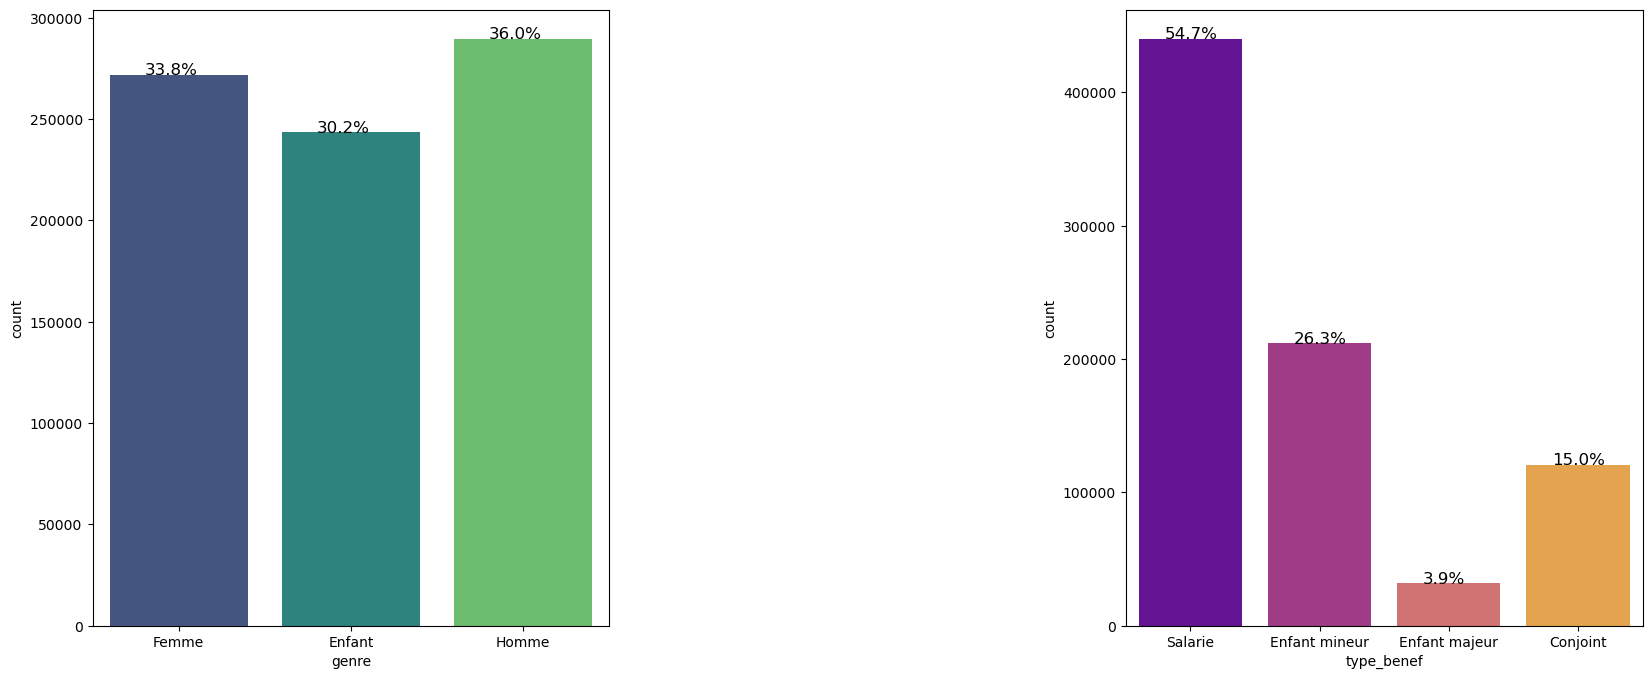

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

ax1 = sns.countplot(data=base_class, x='genre', ax=ax[0], palette='viridis')
# Ajoutez votre fonction without_hue(ax1, dataset.Trim_soins) ici si nécessaire
without_hue(ax1, base_class.genre)

ax2 = sns.countplot(data=base_class[base_class['type_benef'] != 'Autre'], x='type_benef', ax=ax[1], palette='plasma')
# Ajoutez votre fonction without_hue(ax2, dataset.Mois_soins_cat) ici si nécessaire
without_hue(ax2, base_class.type_benef)


# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(wspace=1)  # Vous pouvez ajuster la valeur selon vos besoins

plt.show()

/tmp/ipykernel_1481/3625262404.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=base_class_sorted[base_class_sorted['tranche_age22'] != 'Pas de donnees'], x='tranche_age22', palette='viridis')
/tmp/ipykernel_1481/3625262404.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


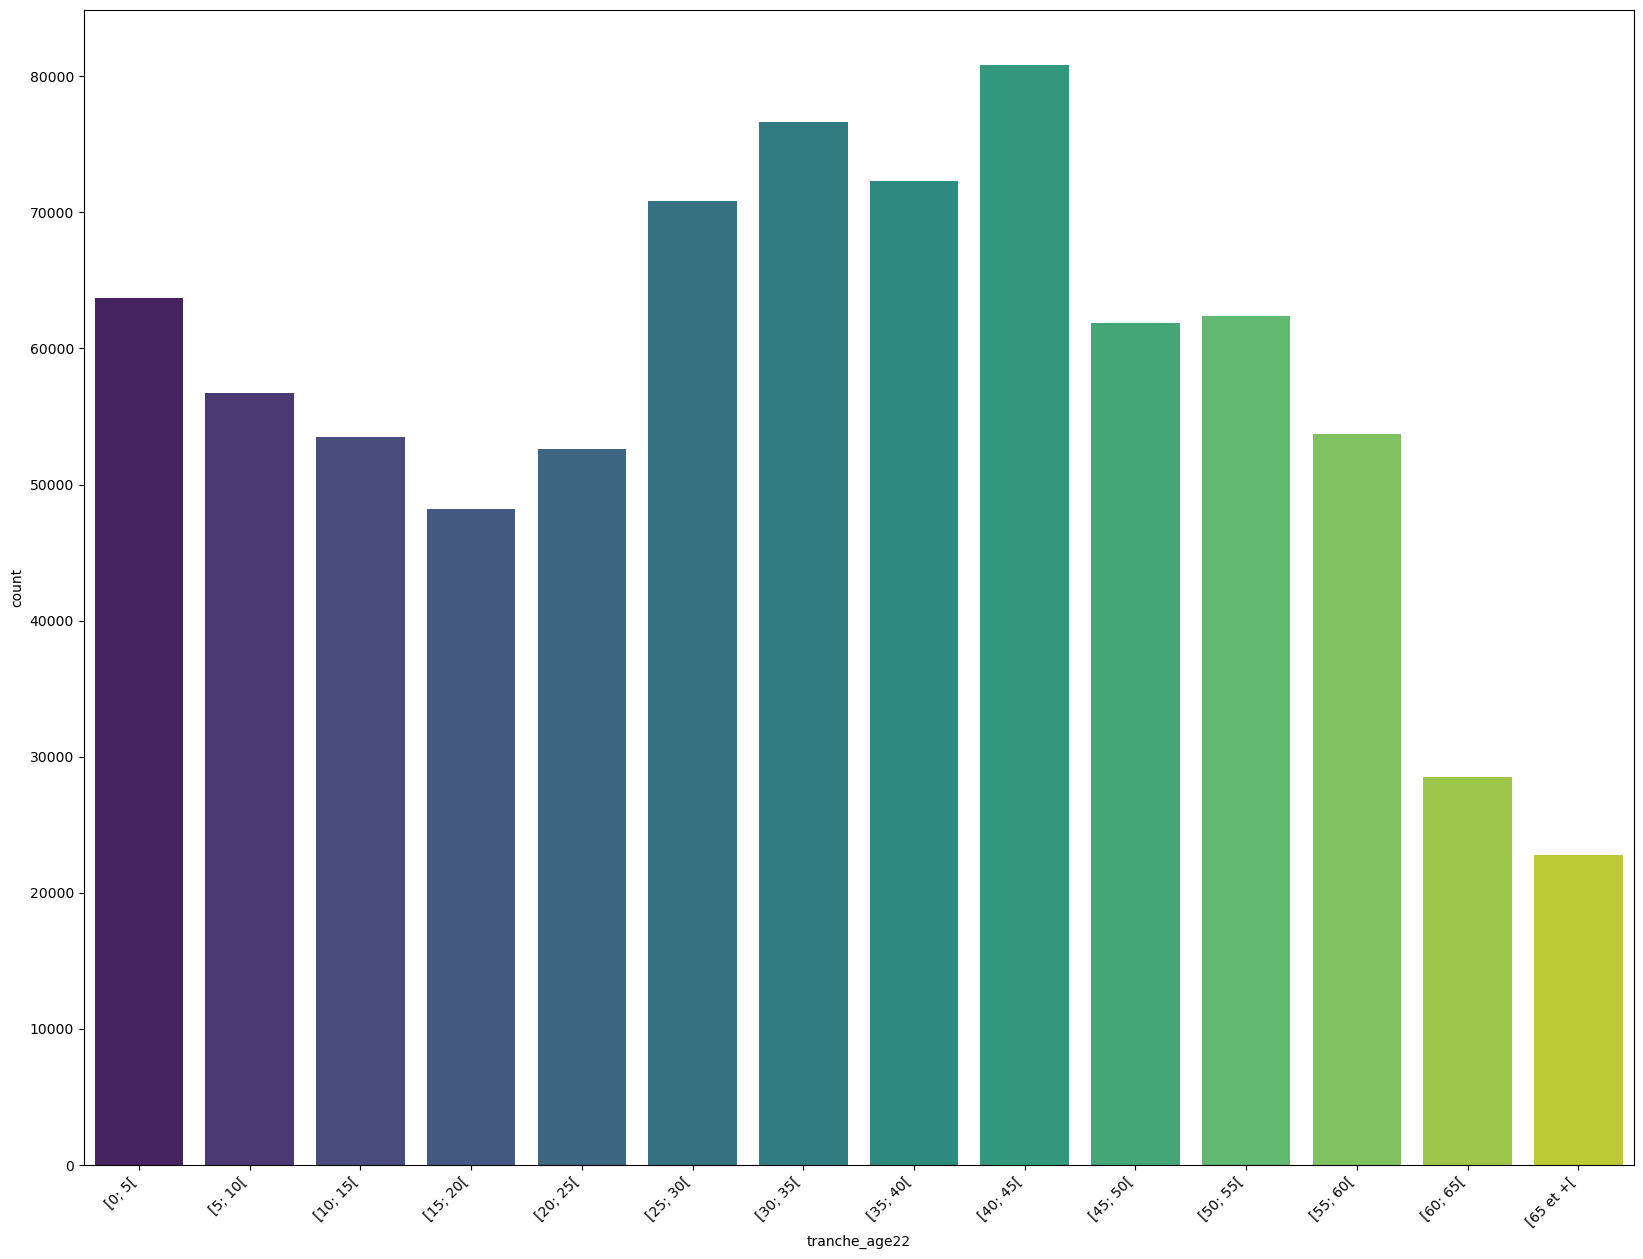

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Assurez-vous d'importer pandas pour utiliser pd.Categorical et pd.sort_values

# Définir l'ordre des tranches d'âge
tranche_age_order = ['[0; 5[','[5; 10[', '[10; 15[', '[15; 20[','[20; 25[','[25; 30[', '[30; 35[', '[35; 40[', '[40; 45[','[45; 50[', '[50; 55[',
                     '[55; 60[', '[60; 65[' , '[65 et +[']   
      
# Trier les données en fonction de l'ordre des tranches d'âge
base_class['tranche_age22'] = pd.Categorical(base_class['tranche_age22'], categories=tranche_age_order, ordered=True)
base_class_sorted = base_class.sort_values('tranche_age22')

fig, ax = plt.subplots(figsize=(20, 15))  # Correction ici pour créer une seule figure sans sous-graphiques

# Création du countplot avec les données triées
#ax1 = sns.countplot(data=base_class_sorted[base_class_sorted['tranche_age22'] != 'Pas de donnees'], x='tranche_age22', palette='viridis')
ax1 = sns.countplot(data=base_class_sorted[base_class_sorted['tranche_age22'] != 'Pas de donnees'], x='tranche_age22', palette='viridis')

# Ajustement des étiquettes de l'axe des abscisses
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Affichage du graphique
plt.show()

## Primes pures annuelles selon le genre, le type de bénéficiare et la tranche d'age

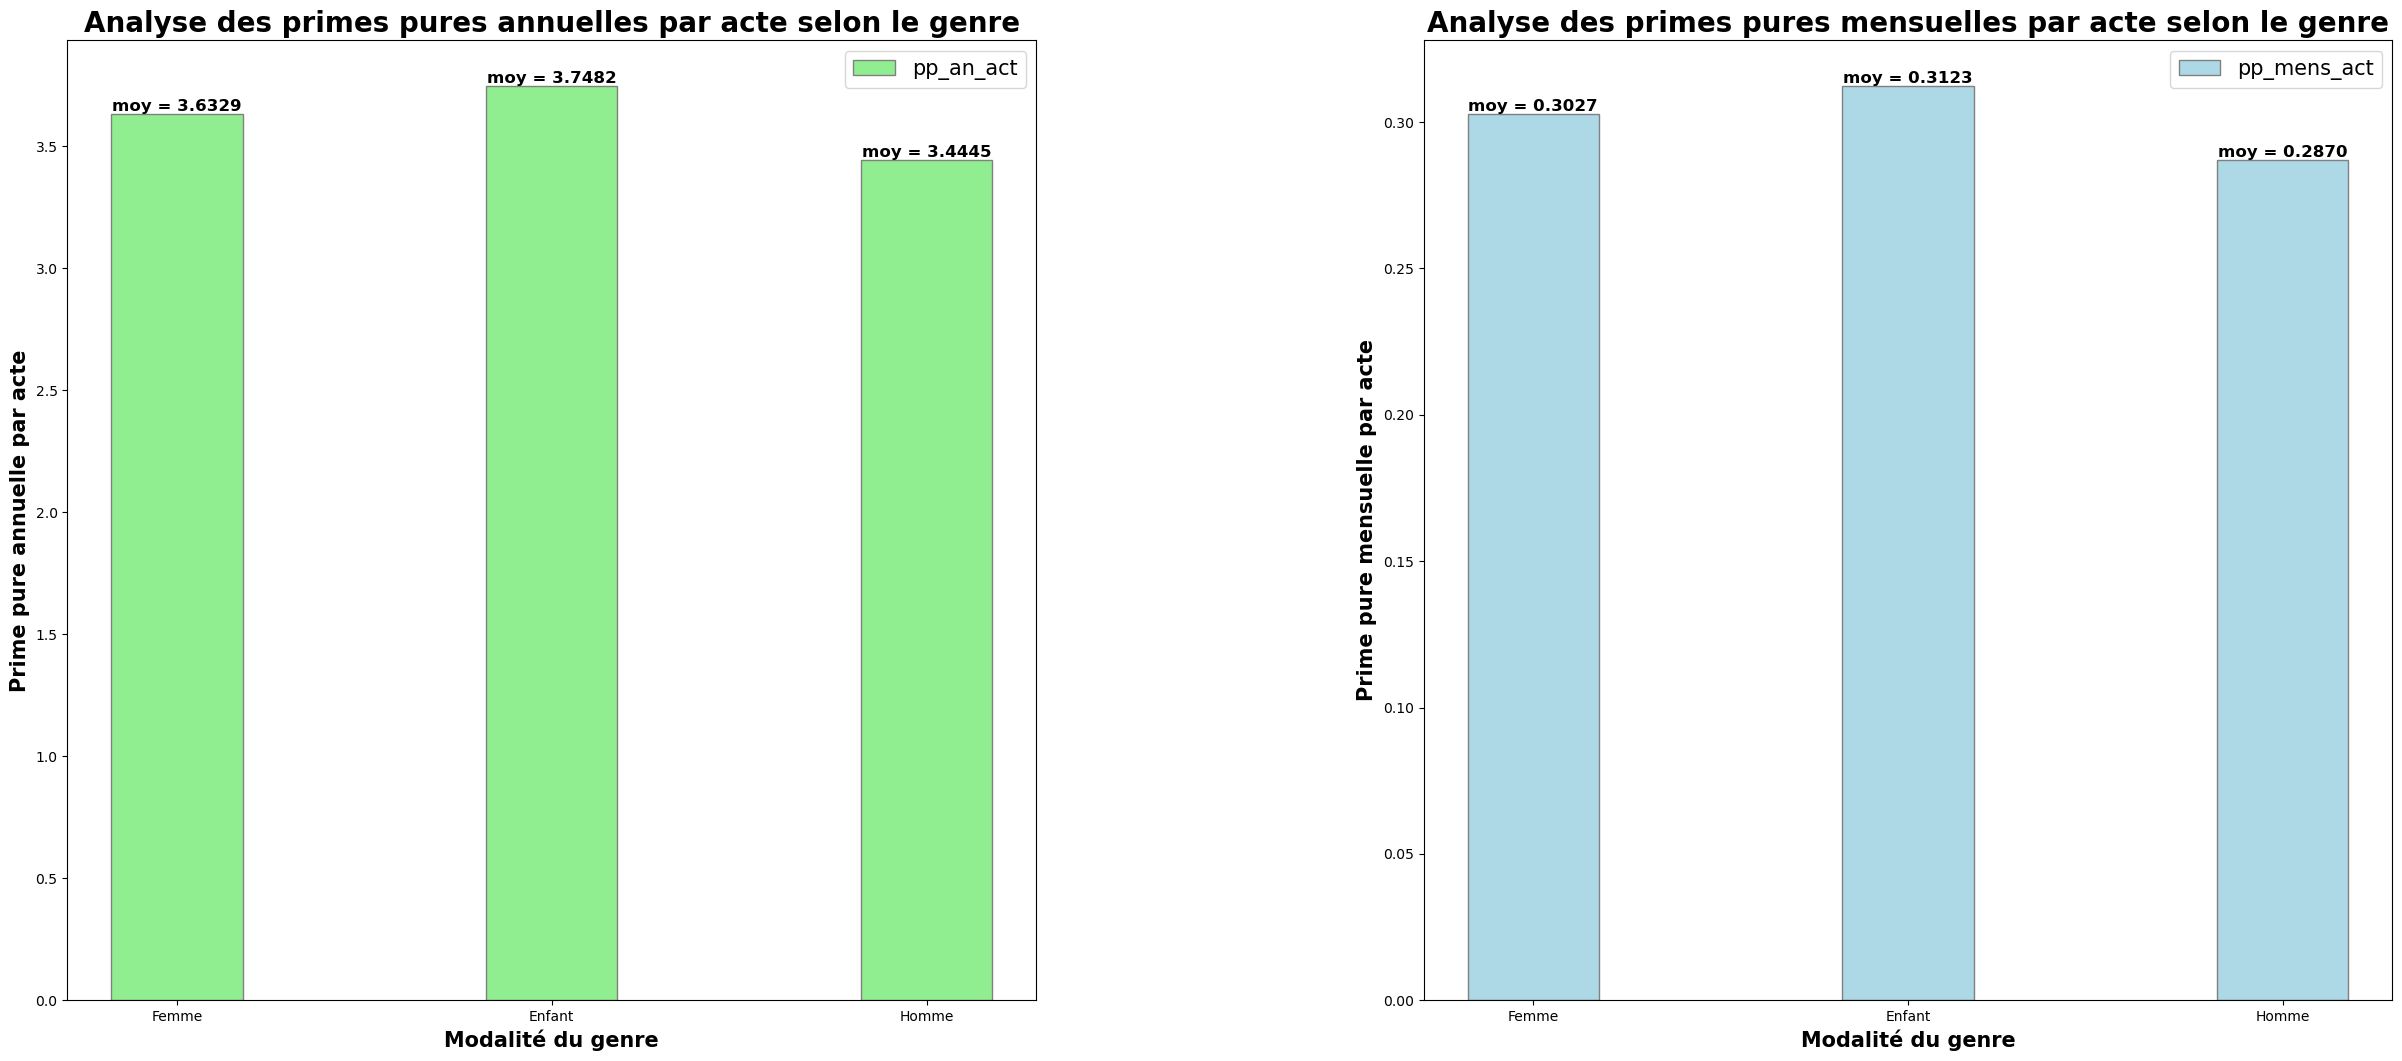

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Définition des positions des barres pour chaque modalité de genre dans l'ordre spécifié
barWidth = 0.35
categories = list(base_class['genre'].unique()) 
r = np.arange(len(categories))

# Calcul des moyennes par genre
mean_pp_an = base_class.groupby('genre')['pp_an_act'].mean()[categories]
mean_pp_mens = base_class.groupby('genre')['pp_mens_act'].mean()[categories]

# Création de la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))

# Graphique pour pp_an_act
bar1 = ax1.bar(r, mean_pp_an, color='lightgreen', width=barWidth, edgecolor='grey', label='pp_an_act')
ax1.set_xticks([pos for pos in r])
ax1.set_xticklabels(categories)
ax1.set_xlabel('Modalité du genre', weight='bold', fontsize=15)
ax1.set_ylabel('Prime pure annuelle par acte', weight='bold', fontsize=15)
ax1.set_title('Analyse des primes pures annuelles par acte selon le genre', weight='bold', fontsize=20)
ax1.legend(fontsize=15)

# Ajout des étiquettes de données pour pp_an_act
for rect in bar1:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, 'moy = %.4f' % height, ha='center', va='bottom', fontsize=12, weight='bold')

# Graphique pour pp_mens_act
bar2 = ax2.bar(r, mean_pp_mens, color='lightblue', width=barWidth, edgecolor='grey', label='pp_mens_act')
ax2.set_xticks([pos for pos in r])
ax2.set_xticklabels(categories)
ax2.set_xlabel('Modalité du genre', weight='bold', fontsize=15)
ax2.set_ylabel('Prime pure mensuelle par acte', weight='bold', fontsize=15)
ax2.set_title('Analyse des primes pures mensuelles par acte selon le genre', weight='bold', fontsize=20)
ax2.legend(fontsize=15)

# Ajout des étiquettes de données pour pp_mens_act
for rect in bar2:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, 'moy = %.4f' % height, ha='center', va='bottom', fontsize=12, weight='bold')

# Ajustement des espacements
plt.subplots_adjust(wspace=0.4, top=0.9, bottom=0.1)

# Affichage du graphique
plt.show()


/tmp/ipykernel_1481/3890325345.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_pp_an_by_age = base_class.groupby('tranche_age22')['pp_an_act'].mean().reindex(age_order)
/tmp/ipykernel_1481/3890325345.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_pp_mens_by_age = base_class.groupby('tranche_age22')['pp_mens_act'].mean().reindex(age_order)


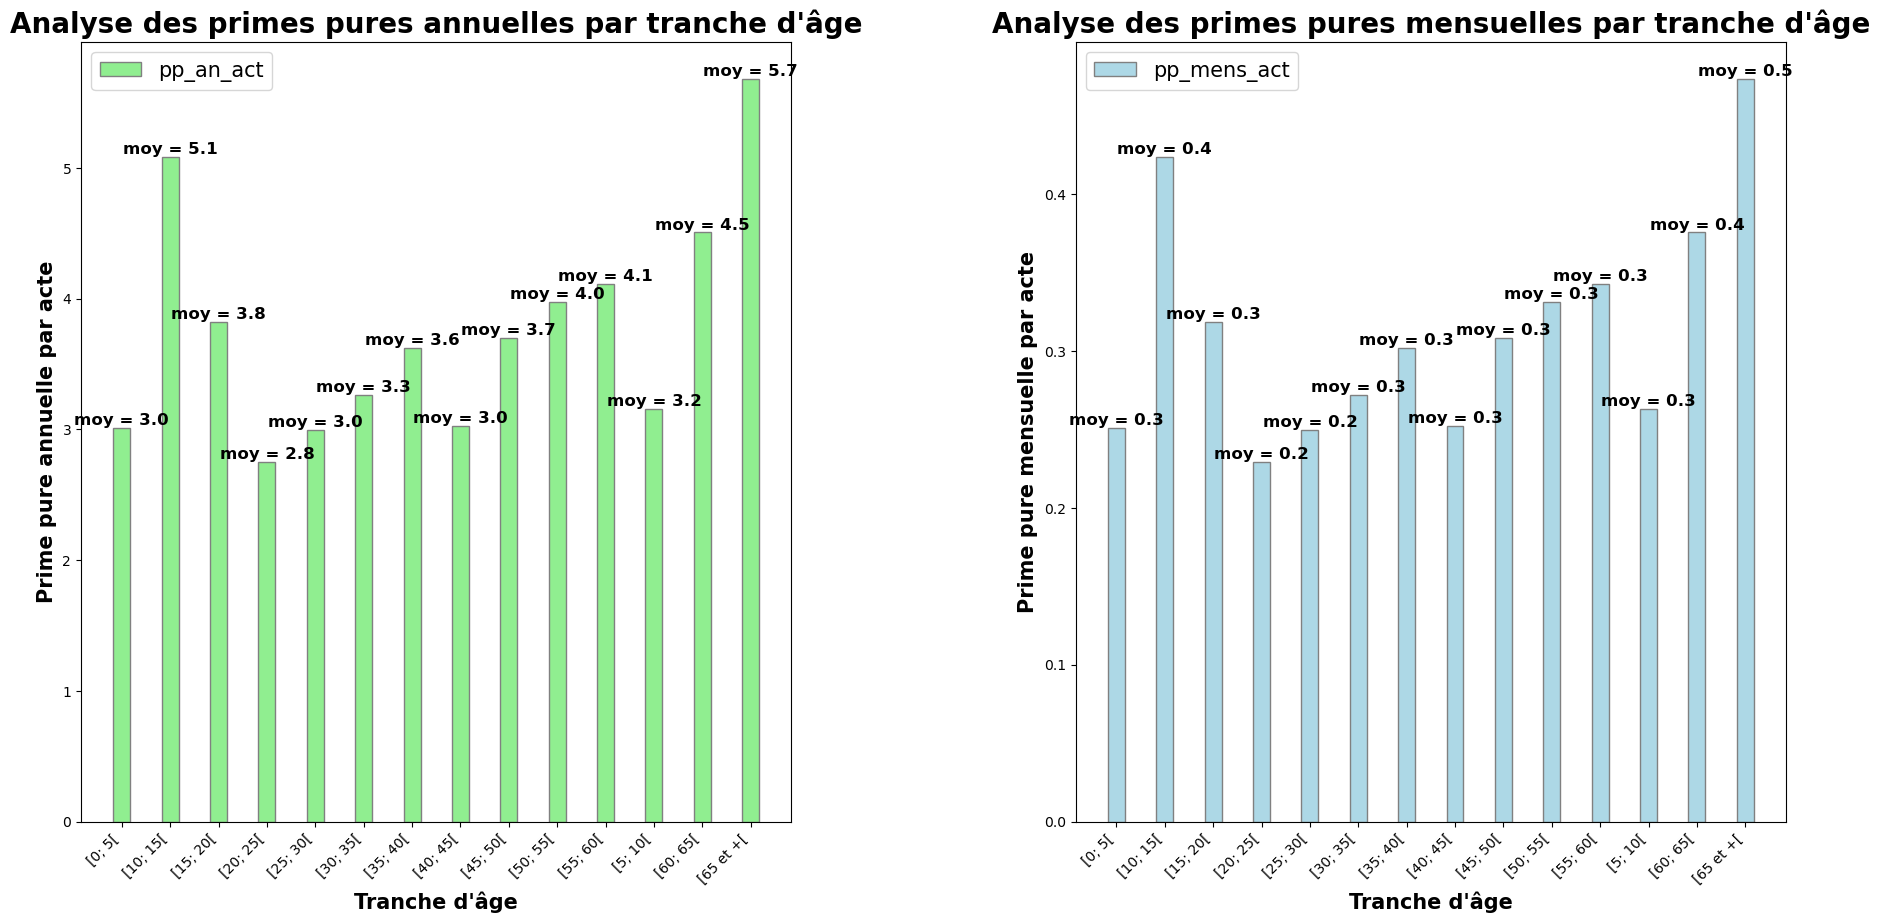

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extraire automatiquement les catégories ordonnées de 'tranche_age22'
age_order = sorted(base_class['tranche_age22'].cat.categories) if base_class['tranche_age22'].dtype.name == 'category' else base_class['tranche_age22'].unique()

# Calculer les moyennes par tranche d'âge pour chaque prime
mean_pp_an_by_age = base_class.groupby('tranche_age22')['pp_an_act'].mean().reindex(age_order)
mean_pp_mens_by_age = base_class.groupby('tranche_age22')['pp_mens_act'].mean().reindex(age_order)

# Positions des barres pour chaque tranche d'âge
r = np.arange(len(age_order))
barWidth = 0.35

# Création de la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 12))

# Graphique pour pp_an_act par tranche d'âge
bar1 = ax1.bar(r, mean_pp_an_by_age, color='lightgreen', width=barWidth, edgecolor='grey', label='pp_an_act')
ax1.set_xticks(r)
ax1.set_xticklabels(age_order, rotation=45, ha='right')
ax1.set_xlabel('Tranche d\'âge', weight='bold', fontsize=15)
ax1.set_ylabel('Prime pure annuelle par acte', weight='bold', fontsize=15)
ax1.set_title('Analyse des primes pures annuelles par tranche d\'âge', weight='bold', fontsize=20)
ax1.legend(fontsize=15)

# Ajout des étiquettes de données pour pp_an_act
for rect in bar1:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, 'moy = %.1f' % height, ha='center', va='bottom', fontsize=12, weight='bold')

# Graphique pour pp_mens_act par tranche d'âge
bar2 = ax2.bar(r, mean_pp_mens_by_age, color='lightblue', width=barWidth, edgecolor='grey', label='pp_mens_act')
ax2.set_xticks(r)
ax2.set_xticklabels(age_order, rotation=45, ha='right')
ax2.set_xlabel('Tranche d\'âge', weight='bold', fontsize=15)
ax2.set_ylabel('Prime pure mensuelle par acte', weight='bold', fontsize=15)
ax2.set_title('Analyse des primes pures mensuelles par tranche d\'âge', weight='bold', fontsize=20)
ax2.legend(fontsize=15)

# Ajout des étiquettes de données pour pp_mens_act
for rect in bar2:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, 'moy = %.1f' % height, ha='center', va='bottom', fontsize=12, weight='bold')

# Ajustement des espacements
plt.subplots_adjust(wspace=0.4, top=0.9, bottom=0.25)

# Affichage du graphique
plt.show()


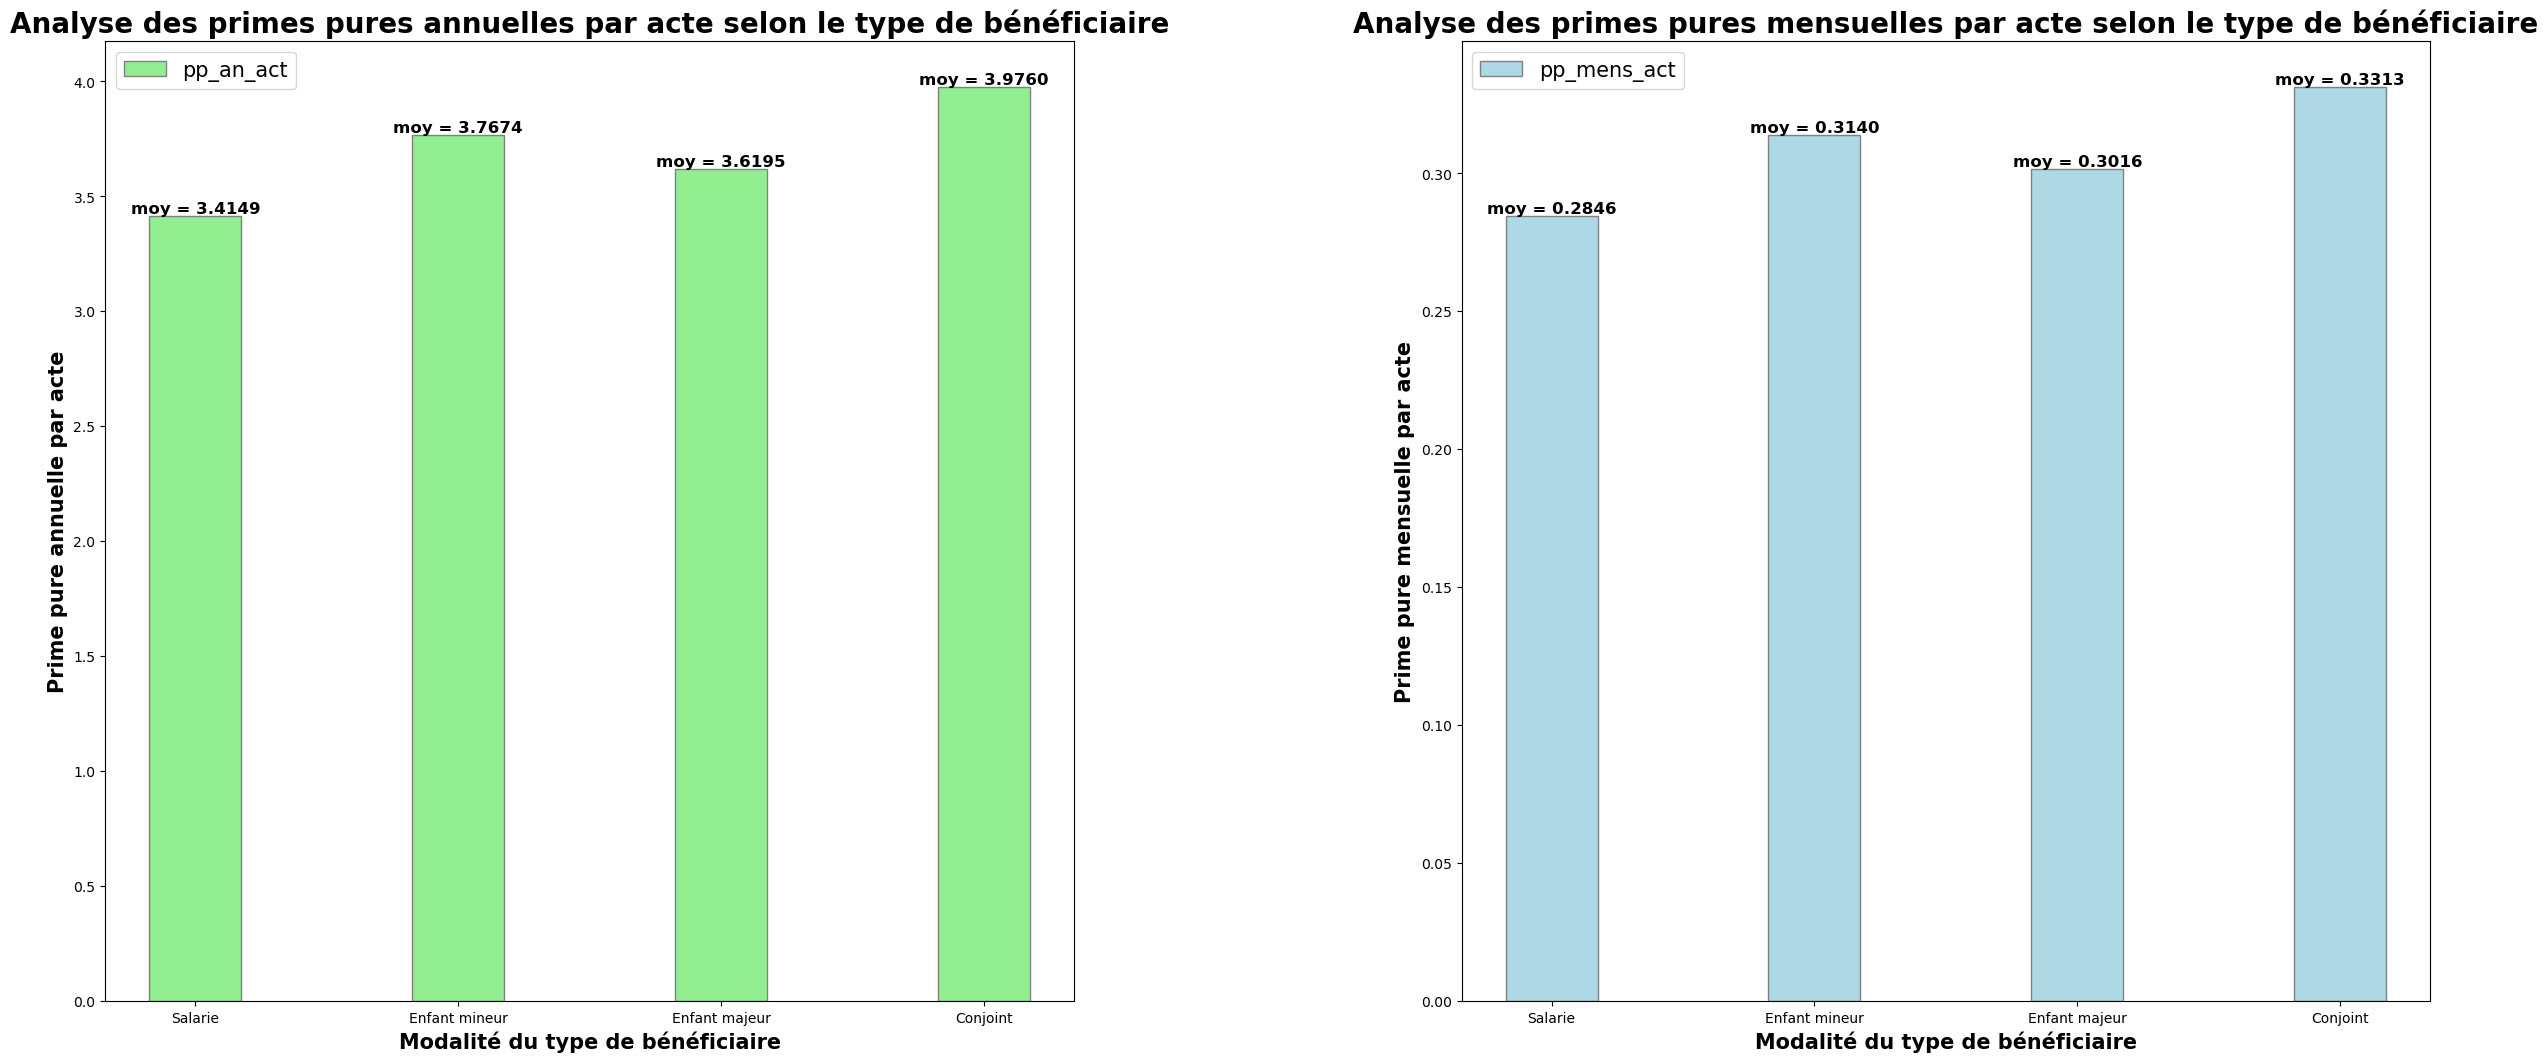

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Définition des positions des barres pour chaque modalité de type_benef dans l'ordre spécifié
barWidth = 0.35
categories = list(base_class['type_benef'].unique()) 
categories.remove('Autre')
r = np.arange(len(categories))

# Calcul des moyennes par type_benef
mean_pp_an = base_class.groupby('type_benef')['pp_an_act'].mean()[categories]
mean_pp_mens = base_class.groupby('type_benef')['pp_mens_act'].mean()[categories]

# Création de la figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))

# Graphique pour pp_an_act
bar1 = ax1.bar(r, mean_pp_an, color='lightgreen', width=barWidth, edgecolor='grey', label='pp_an_act')
ax1.set_xticks([pos for pos in r])
ax1.set_xticklabels(categories)
ax1.set_xlabel('Modalité du type de bénéficiaire', weight='bold', fontsize=15)
ax1.set_ylabel('Prime pure annuelle par acte', weight='bold', fontsize=15)
ax1.set_title('Analyse des primes pures annuelles par acte selon le type de bénéficiaire', weight='bold', fontsize=20)
ax1.legend(fontsize=15)

# Ajout des étiquettes de données pour pp_an_act
for rect in bar1:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, 'moy = %.4f' % height, ha='center', va='bottom', fontsize=12, weight='bold')

# Graphique pour pp_mens_act
bar2 = ax2.bar(r, mean_pp_mens, color='lightblue', width=barWidth, edgecolor='grey', label='pp_mens_act')
ax2.set_xticks([pos for pos in r])
ax2.set_xticklabels(categories)
ax2.set_xlabel('Modalité du type de bénéficiaire', weight='bold', fontsize=15)
ax2.set_ylabel('Prime pure mensuelle par acte', weight='bold', fontsize=15)
ax2.set_title('Analyse des primes pures mensuelles par acte selon le type de bénéficiaire', weight='bold', fontsize=20)
ax2.legend(fontsize=15)

# Ajout des étiquettes de données pour pp_mens_act
for rect in bar2:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, 'moy = %.4f' % height, ha='center', va='bottom', fontsize=12, weight='bold')

# Ajustement des espacements
plt.subplots_adjust(wspace=0.4, top=0.9, bottom=0.1)

# Affichage du graphique
plt.show()


In [148]:
# Identifier la modalité dominante de la variable A
dominante = base_class['type_benef'].mode()[0]

# Remplacer la modalité 'Autre' par la modalité dominante
base_class['type_benef'] = base_class['type_benef'].replace('Autre', dominante)

In [149]:
base_class['genre_cat'] = base_class['genre'].replace({'Homme': 1, 'Femme': 2, 'Enfant': 3})
base_class['type_benef_cat'] = base_class['type_benef'].replace({'Salarie': 1, 'Conjoint': 2, 'Enfant majeur': 3, 'Enfant mineur': 4})

/tmp/ipykernel_1481/1514885158.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_class['genre_cat'] = base_class['genre'].replace({'Homme': 1, 'Femme': 2, 'Enfant': 3})
/tmp/ipykernel_1481/1514885158.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_class['type_benef_cat'] = base_class['type_benef'].replace({'Salarie': 1, 'Conjoint': 2, 'Enfant majeur': 3, 'Enfant mineur': 4})


In [150]:
base_class['type_benef'].unique()

array(['Salarie', 'Enfant mineur', 'Enfant majeur', 'Conjoint'],
      dtype=object)

In [151]:
# Convertir le DataFrame en liste de listes et exporter manuellement
with open('base_class22.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(base_class.columns)  # Écrire les en-têtes de colonnes
    writer.writerows(base_class.values)  # Écrire les données

# A PRESENT NOUS AVONS UNE BASE FORMATEE POUR APPLIQUER LES METHODES DE CLASSIFICATION